In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
file_months = {"April 2024.xlsx": "April",
               "May 2024.xlsx": "May",
               "June 2024.xlsx": "June",
               "July 2024.xlsx": "July",
               "August 2024.xlsx": "August",
               "September 2024.xlsx": "September",
               "October 2024.xlsx": "October",
               "November 2024 corrected.xlsx": "November",
               "December 2024.xlsx": "December",
               "January 2025.xlsx": "January",
               "February 2025.xlsx": "February",
               "March 2025.xlsx": "March"
    
}


In [21]:
all_data = []
for file, month in file_months.items():
    df_month = pd.read_excel(file, engine="openpyxl")
    df_month['Start time'] = pd.to_datetime(df_month['Start time'])
    df_month['Month_Day'] = df_month['Start time'].dt.strftime('%B, %-d')
    all_data.append(df_month)


In [39]:
df = pd.concat(all_data, ignore_index=True)


In [41]:
df = df.drop_duplicates()  


In [43]:
df['Start time'] = pd.to_datetime(df['Start time'])
df['Start time Hour/Min'] = df['Start time'].dt.strftime('%I:%M %p')

df.sort_values(by=['Correlation ID', 'Start time'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [45]:
df.head(10)

,Start time,Answer time,Duration,Called number,Correlation ID,Location,Inbound trunk,Outbound trunk,Route group,Direction,...,Device owner UUID,Call Recording Platform Name,Call Recording Result,Call Recording Trigger,Redirecting party UUID,Public Calling IP Address,Public Called IP Address,Month_Day,User,Start time Hour/Min
0,2024-10-05 17:30:09.903000+00:00,2024-10-05T17:30:10.320Z,1961,13124312299,00001e73-ce33-48f1-b531-bddc7ee3965d,HQ,NaN,wcc_Iyq3fhu9TjS8hbku8c4Zcg,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"October, 5",NaN,05:30 PM
1,2024-12-11 20:41:47.355000+00:00,2024-12-11T20:42:05.392Z,44,13123478311,00006ccc-8250-4993-90c0-bbfd41f7dd24,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"December, 11",NaN,08:41 PM
2,2024-12-11 20:42:05.358000+00:00,2024-12-11T20:42:05.392Z,44,13123478300,00006ccc-8250-4993-90c0-bbfd41f7dd24,HQ,NaN,NaN,NaN,ORIGINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"December, 11",NaN,08:42 PM
3,2024-12-11 20:42:05.358000+00:00,2024-12-11T20:42:05.392Z,44,13123478300,00006ccc-8250-4993-90c0-bbfd41f7dd24,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"December, 11",NaN,08:42 PM
4,2024-09-13 19:35:32.428000+00:00,2024-09-13T19:35:53.509Z,57,17086568223,000090ae-a71c-49e9-99d6-fdc7078dfa48,HQ,NaN,NaN,NaN,ORIGINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"September, 13",NaN,07:35 PM
5,2024-11-28 15:49:47.564000+00:00,2024-11-28T15:49:47.765Z,2,13123411070,0000aef0-6f35-4560-a4be-5b3bc31fbefb,HQ,NaN,wcc_Pc_tp-ipRwm_ku064NHZiw,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"November, 28",NaN,03:49 PM
6,2024-07-08 19:40:25.476000+00:00,2024-07-08T19:40:43.514Z,51,13123478302,0000bc93-3ace-4092-91ef-ff7cebd5ebde,HQ,NaN,NaN,NaN,ORIGINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"July, 8",NaN,07:40 PM
7,2024-07-08 19:40:25.476000+00:00,2024-07-08T19:40:43.514Z,51,13123478302,0000bc93-3ace-4092-91ef-ff7cebd5ebde,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"July, 8",NaN,07:40 PM
8,2024-07-08 19:40:43.479000+00:00,2024-07-08T19:40:43.514Z,51,13123478300,0000bc93-3ace-4092-91ef-ff7cebd5ebde,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"July, 8",NaN,07:40 PM
9,2024-07-08 19:40:43.479000+00:00,2024-07-08T19:40:43.514Z,51,13123478300,0000bc93-3ace-4092-91ef-ff7cebd5ebde,HQ,NaN,NaN,NaN,ORIGINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"July, 8",NaN,07:40 PM


### Question Preparation

In [47]:
intake_line_numbers = {
    "A2J Immigration": 13123478347,
    "A2J Immigration Toll Free": 18882652188,
    "Austin Intake VM": 13124235904,
    "Bankruptcy Helpdesk VM": 13122296344, 
    "CLASP VM": 13124235900,
    "Criminal Records": 13122296071,
    "Education Law Referrals VM": 13123478392,
    "Fair Housing Intake VM": 13124235909, 
    "HIV Intake VM": 13123478309,
    "JEHD": 13122296072,
    "legalclinics": 13124235938,
    "OP Appeals Project": 13124312101, 
    "Veterans Rights Project VM": 13123478340,
    "Trafficking Survivors Assistance Project": 13122296073,
    "Migrant Legal Assistance Program": 13124312299,
    "Nursing Home Ombudsman": 13122296079,
    "Markham Eviction Help Desk": 13122296014
}

In [49]:
df['Intake Line Name'] = df['Called number'].apply(
    lambda x: next((k for k, v in intake_line_numbers.items() if x == v), None)
)

# Filtering for special Intake Line numbers
intake_df = df[df['Intake Line Name'].notna()].copy()

# Reordering columns for better readability
front_cols = [
    'Correlation ID', 'Start time', 'Start time Hour/Min', 'Month_Day',
    'Direction', 'Called number', 'Intake Line Name'
]
other_cols = [col for col in intake_df.columns if col not in front_cols]
intake_df = intake_df[front_cols + other_cols]

In [51]:
intake_df.head(12)

,Correlation ID,Start time,Start time Hour/Min,Month_Day,Direction,Called number,Intake Line Name,Answer time,Duration,Location,...,PSTN provider ID,External caller ID number,Device owner UUID,Call Recording Platform Name,Call Recording Result,Call Recording Trigger,Redirecting party UUID,Public Calling IP Address,Public Called IP Address,User
0,00001e73-ce33-48f1-b531-bddc7ee3965d,2024-10-05 17:30:09.903000+00:00,05:30 PM,"October, 5",TERMINATING,13124312299,Migrant Legal Assistance Program,2024-10-05T17:30:10.320Z,1961,HQ,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0001736f-cdab-4164-8756-6784d802f051,2024-04-23 17:59:16.754000+00:00,05:59 PM,"April, 23",ORIGINATING,13124235938,legalclinics,2024-04-23T17:59:34.813Z,24,HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0001736f-cdab-4164-8756-6784d802f051,2024-04-23 17:59:16.754000+00:00,05:59 PM,"April, 23",TERMINATING,13124235938,legalclinics,2024-04-23T17:59:34.813Z,24,HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,000221b3-005b-460d-8419-b54347b6dd90,2024-08-06 19:41:55.506000+00:00,07:41 PM,"August, 6",TERMINATING,13124235904,Austin Intake VM,2024-08-06T19:41:55.560Z,8,HQ,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,00023966-ce30-4938-8979-f97ed2a30159,2024-04-15 15:00:27.205000+00:00,03:00 PM,"April, 15",ORIGINATING,13124235938,legalclinics,2024-04-15T15:00:45.266Z,108,HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,00023966-ce30-4938-8979-f97ed2a30159,2024-04-15 15:00:27.205000+00:00,03:00 PM,"April, 15",TERMINATING,13124235938,legalclinics,2024-04-15T15:00:45.266Z,108,HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,00024807-b746-4da9-83c0-8827feca2497,2024-12-04 02:23:29.721000+00:00,02:23 AM,"December, 4",TERMINATING,13122296071,Criminal Records,2024-12-04T02:23:47.741Z,6,HQ,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0003cb9a-ca8c-4f94-90cb-995bf14820f6,2024-09-23 20:17:20.442000+00:00,08:17 PM,"September, 23",TERMINATING,13122296079,Nursing Home Ombudsman,2024-09-23T20:17:38.479Z,93,HQ,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,00041457-a567-46be-87b8-70c51d797ace,2024-07-27 01:40:30.988000+00:00,01:40 AM,"July, 27",TERMINATING,13122296071,Criminal Records,2024-07-27T01:40:49.049Z,19,HQ,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,00043ba2-b5c0-46db-8906-9f519bab60c5,2024-07-27 21:46:10.814000+00:00,09:46 PM,"July, 27",TERMINATING,13124312299,Migrant Legal Assistance Program,2024-07-27T21:46:11.071Z,31,HQ,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1: Call volumes for each of the intake lines

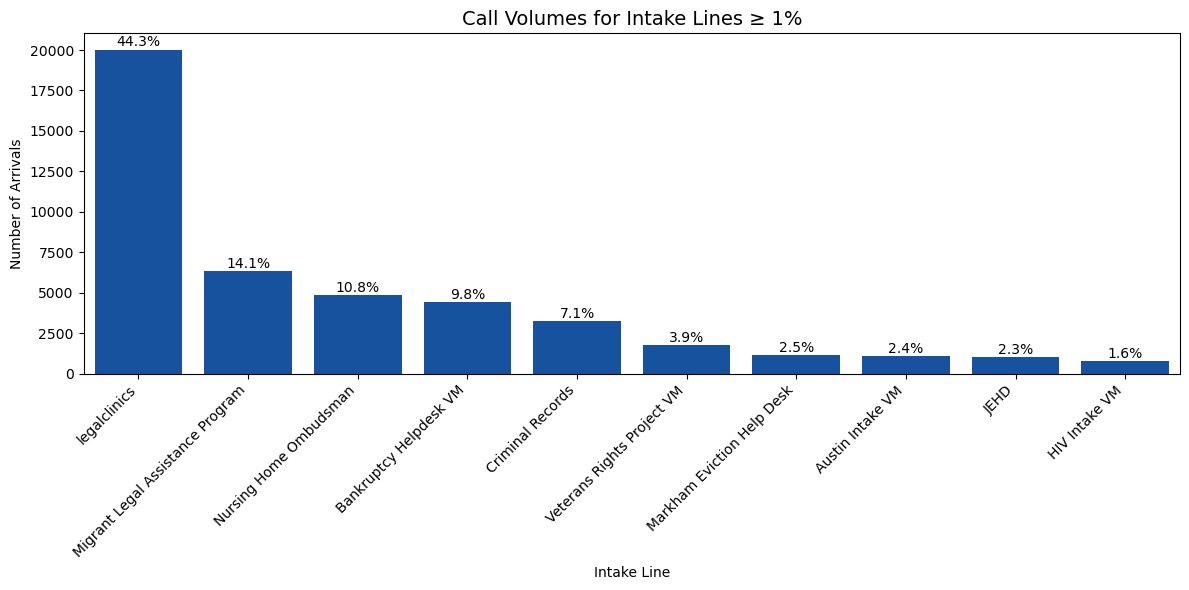

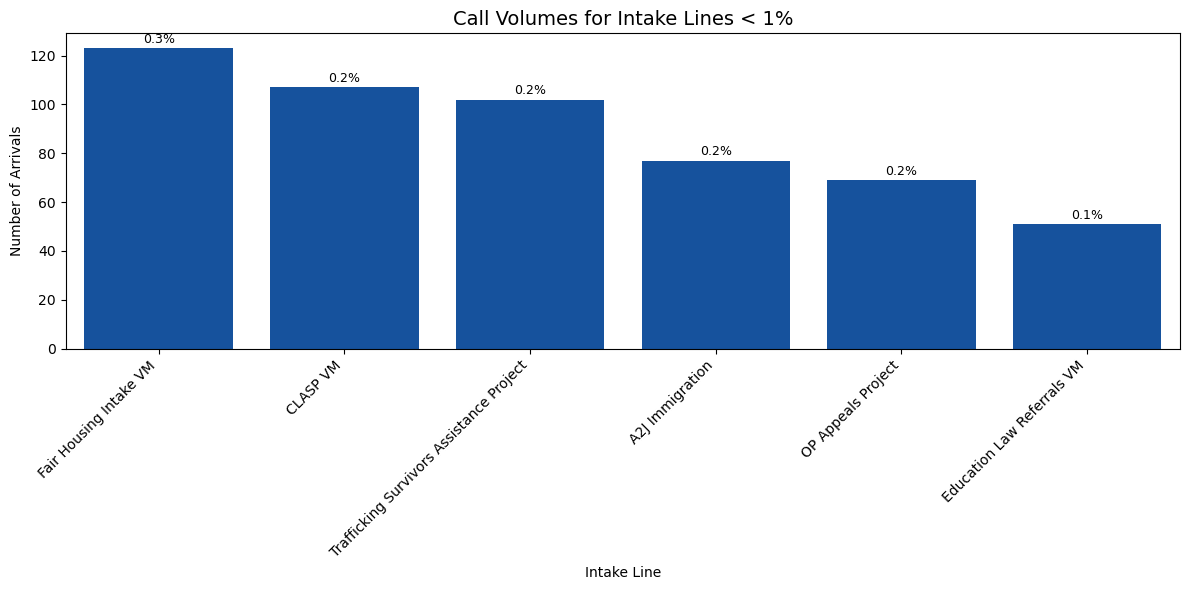

In [77]:
## Testing Difference in plots when not accounting for unique correlation IDs

# Filtering for TERMINATING legs 
intake_terminating = intake_df[intake_df['Direction'] == 'TERMINATING'].copy()

# Getting Call Volumes and sorting in descending order 
call_volumes = intake_terminating['Intake Line Name'].value_counts().sort_values(ascending=False)

# percentages 
total_calls = call_volumes.sum()
percentages = (call_volumes / total_calls * 100).round(1)

# For better visability, splitting data into ≥1% and <1% groups 
above_1pct = call_volumes[percentages >= 1]
above_1pct_pct = percentages[percentages >= 1]

below_1pct = call_volumes[percentages < 1]
below_1pct_pct = percentages[percentages < 1]

# First Plot: ≥1% Intake Lines 
plt.figure(figsize=(12, 6))
sns.barplot(x=above_1pct.index, y=above_1pct.values, color='#0050B3')

# Labels
for i, (value, percent) in enumerate(zip(above_1pct.values, above_1pct_pct.values)):
    plt.text(i, value + 2, f'{percent}%', ha='center', va='bottom', fontsize=10)

plt.title('Call Volumes for Intake Lines ≥ 1%', fontsize=14)
plt.xlabel('Intake Line')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Second Plot: <1% Intake Lines
plt.figure(figsize=(12, 6))
sns.barplot(x=below_1pct.index, y=below_1pct.values, color='#0050B3')

# Labels
for i, (value, percent) in enumerate(zip(below_1pct.values, below_1pct_pct.values)):
    plt.text(i, value + 1, f'{percent}%', ha='center', va='bottom', fontsize=9)

plt.title('Call Volumes for Intake Lines < 1%', fontsize=14)
plt.xlabel('Intake Line')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


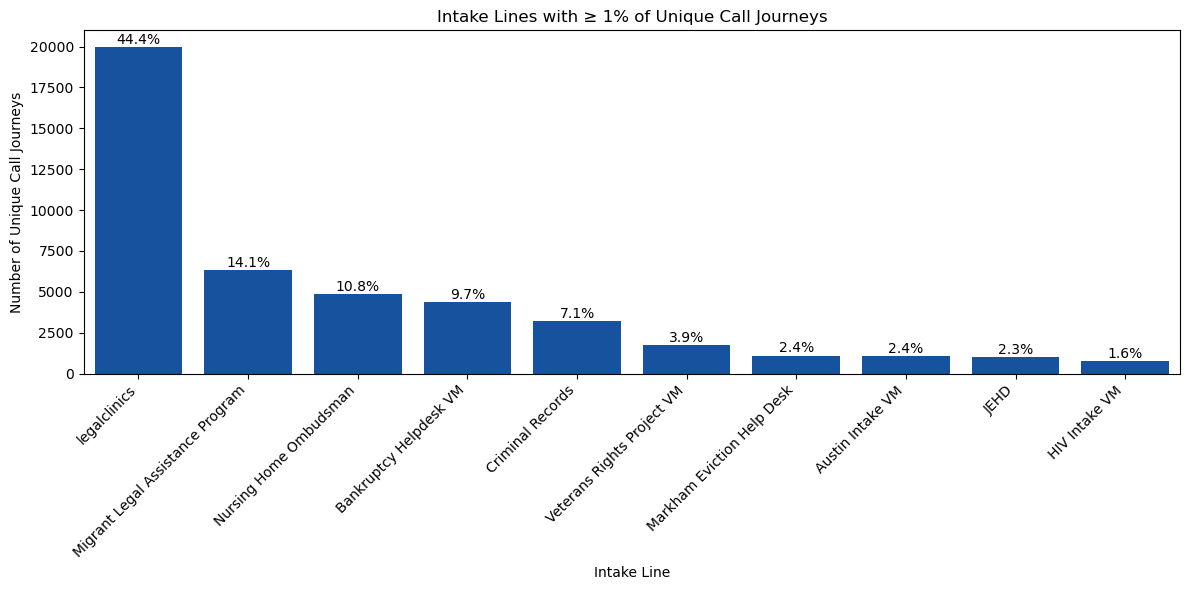

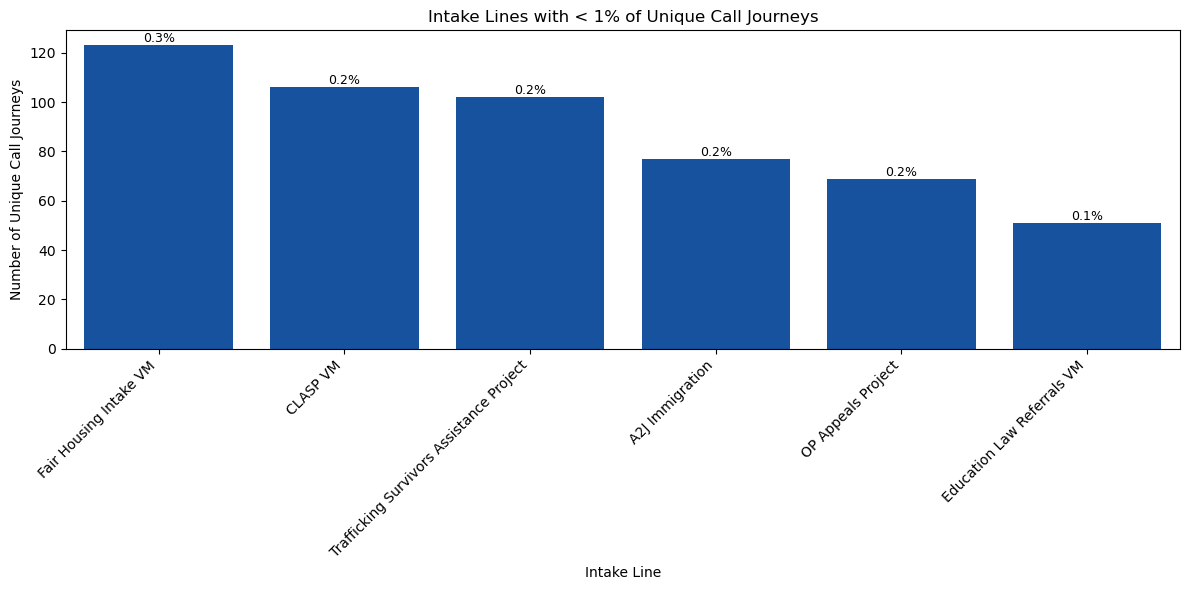

In [129]:
## Plots when accounting for unique correlation IDs 

# --- Filter for TERMINATING legs to intake lines ---
intake_terminating = intake_df[intake_df['Direction'] == 'TERMINATING'].copy()

# --- Getting call volume for unique Correlation IDs per intake line 
unique_calls_per_line = intake_terminating.groupby('Intake Line Name')['Correlation ID'].nunique()
total_unique_calls = unique_calls_per_line.sum()

percentages = (unique_calls_per_line / total_unique_calls * 100)
call_data = unique_calls_per_line.to_frame(name='Count')
call_data['Percentage'] = percentages

# For better visability, splitting data into ≥1% and <1% groups 
above_1 = call_data[call_data['Percentage'] >= 1].sort_values('Count', ascending=False)
below_1 = call_data[call_data['Percentage'] < 1].sort_values('Count', ascending=False)

# Plot 1: Intake Lines ≥ 1% 
plt.figure(figsize=(12, 6))
sns.barplot(x=above_1.index, y=above_1['Count'], color='#0050B3')
for i, (value, percent) in enumerate(zip(above_1['Count'], above_1['Percentage'])):
    plt.text(i, value + 1, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)
plt.title('Intake Lines with ≥ 1% of Unique Call Journeys')
plt.xlabel('Intake Line')
plt.ylabel('Number of Unique Call Journeys')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 2: Intake Lines < 1%
plt.figure(figsize=(12, 6))
sns.barplot(x=below_1.index, y=below_1['Count'], color='#0050B3')
for i, (value, percent) in enumerate(zip(below_1['Count'], below_1['Percentage'])):
    plt.text(i, value + 0.01, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9)
plt.title('Intake Lines with < 1% of Unique Call Journeys')
plt.xlabel('Intake Line')
plt.ylabel('Number of Unique Call Journeys')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Question 2: Direct vs Internal Transfer 

Direct                                    False   True  Total    Direct %  \
Intake Line Name                                                            
Criminal Records                             17   1814   1831   99.071546   
HIV Intake VM                                 0    417    417  100.000000   
Trafficking Survivors Assistance Project      1     58     59   98.305085   
Veterans Rights Project VM                    4    993    997   99.598796   
legalclinics                                 30  11134  11164   99.731279   

Direct                                    Transfer %  
Intake Line Name                                      
Criminal Records                            0.928454  
HIV Intake VM                               0.000000  
Trafficking Survivors Assistance Project    1.694915  
Veterans Rights Project VM                  0.401204  
legalclinics                                0.268721  


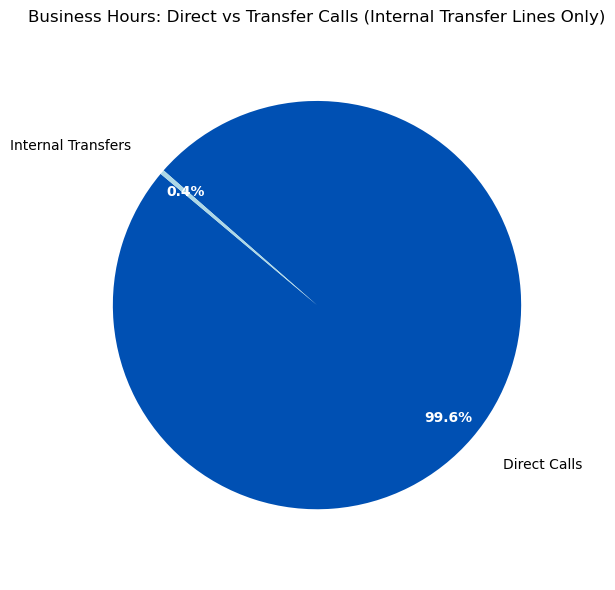

In [240]:
intake_terminating['Hour'] = intake_terminating['Start time'].dt.hour

# Filtering for business hours (8:00 AM to 5:00 PM)
business_hours = intake_terminating[(intake_terminating['Hour'] >= 8) & (intake_terminating['Hour'] <= 17)].copy()

# Sorting to identify the first TERMINATING leg per Correlation ID + Day 
business_hours = business_hours.sort_values(['Correlation ID', 'Month_Day', 'Start time'])
first_legs = business_hours.groupby(['Correlation ID', 'Month_Day']).head(1)

# Marking 'Direct' if it's the first TERMINATING leg of the day
business_hours['Direct'] = business_hours.index.isin(first_legs.index)

# Intake lines with internal transfer capability 
transfer_capable_lines = [
    "legalclinics",
    "Veterans Rights Project VM",
    "Trafficking Survivors Assistance Project",
    "Criminal Records",
    "HIV Intake VM"
]

transfer_scope_df = business_hours[business_hours['Intake Line Name'].isin(transfer_capable_lines)].copy()

# Summaries for Direct vs Transfer counts
summary = transfer_scope_df.groupby('Intake Line Name')['Direct'].value_counts().unstack(fill_value=0)
summary['Total'] = summary.sum(axis=1)
summary['Direct %'] = summary[True] / summary['Total'] * 100
summary['Transfer %'] = summary[False] / summary['Total'] * 100

print(summary)

# Counts for pie chart 
direct_count = summary[True].sum()
transfer_count = summary[False].sum()

# Pie chart: Direct vs Transfer Calls from Transfer-Capable Lines
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    [direct_count, transfer_count],
    labels=['Direct Calls', 'Internal Transfers'],
    colors=['#0050B3', 'lightblue'],
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.2,
    pctdistance=0.85
)

for text in texts:
    text.set_fontsize(10)
    text.set_color('black') 

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')  
    autotext.set_weight('bold')  

ax.set_title('Business Hours: Direct vs Transfer Calls (Internal Transfer Lines Only)')
plt.axis('equal')
plt.tight_layout()
plt.show()

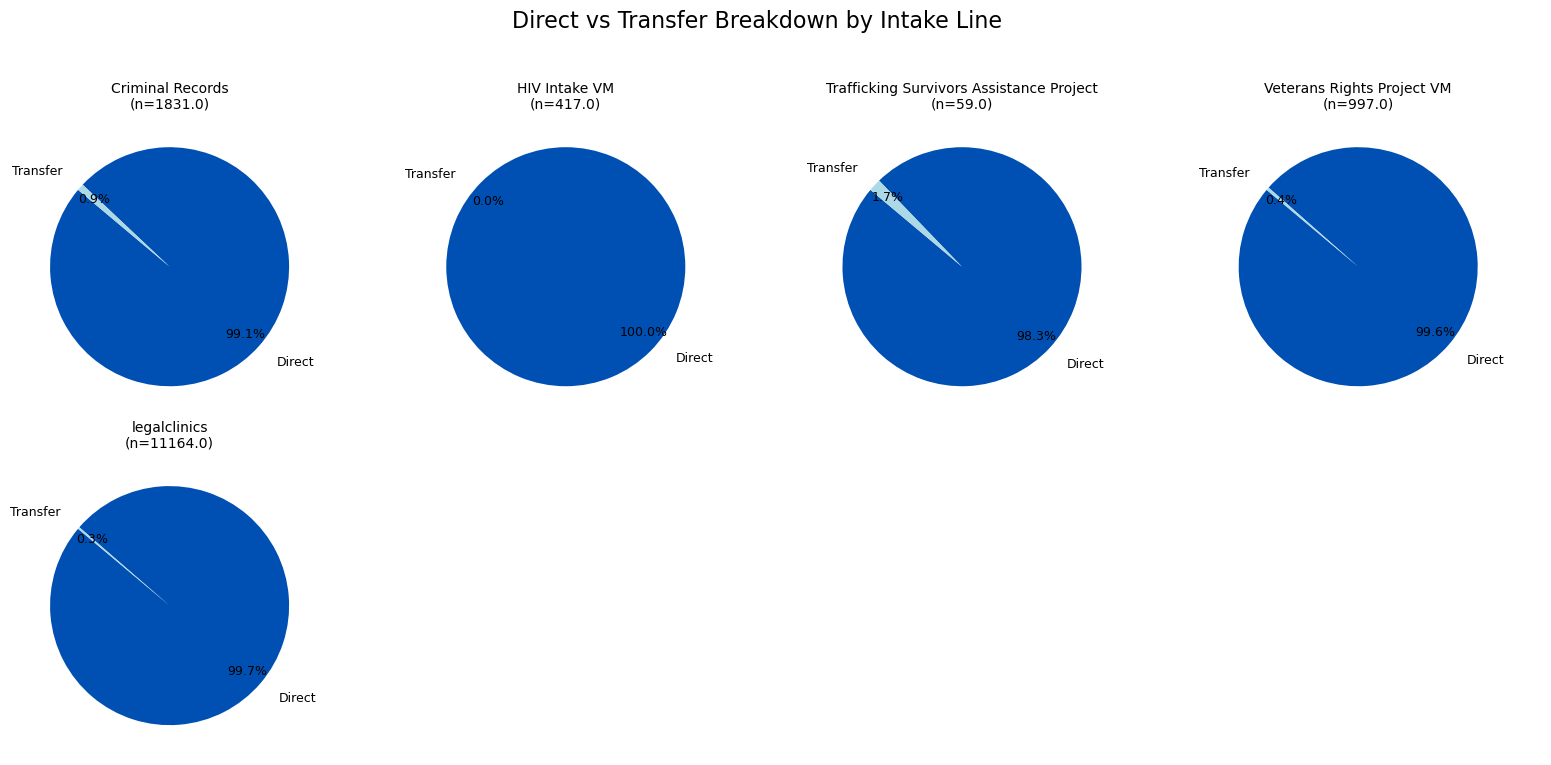

In [223]:
lines_to_plot = summary[summary['Total'] > 0]
n = len(lines_to_plot)
cols = 4
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axs = axs.flatten()

for i, (line_name, row) in enumerate(lines_to_plot.iterrows()):
    wedges, texts, autotexts = axs[i].pie(
        [row[True], row[False]],
        labels=['Direct', 'Transfer'],
        colors=['#0050B3', 'lightblue'],
        autopct='%1.1f%%',
        startangle=140,
        labeldistance=1.2,
        pctdistance=0.85
    )
    axs[i].set_title(f"{line_name}\n(n={row['Total']})", fontsize=10)
    for autotext in autotexts:
        autotext.set_fontsize(9)
    for text in texts:
        text.set_fontsize(9)

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.suptitle('Direct vs Transfer Breakdown by Intake Line', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

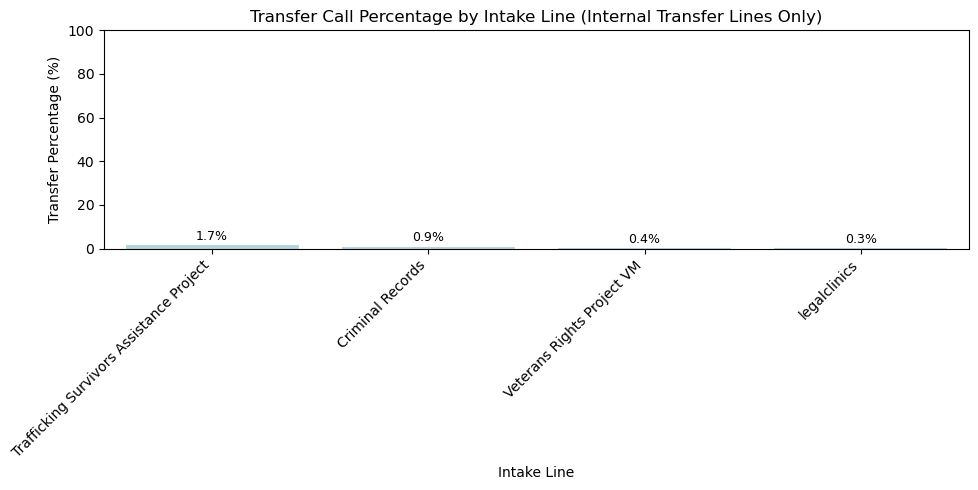

In [236]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=transfer_summary.index, y=transfer_summary['Transfer %'], color='lightblue')
plt.title('Transfer Call Percentage by Intake Line (Internal Transfer Lines Only)')
plt.ylabel('Transfer Percentage (%)')
plt.xlabel('Intake Line')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

for i, val in enumerate(transfer_summary['Transfer %']):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Question 3: Time of Day & Day of Week Trends

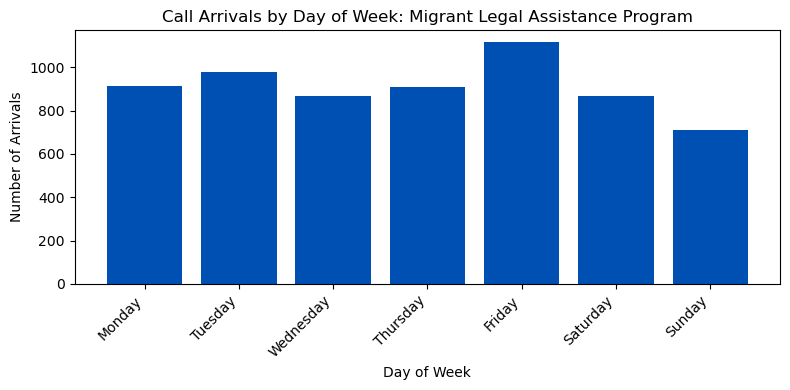

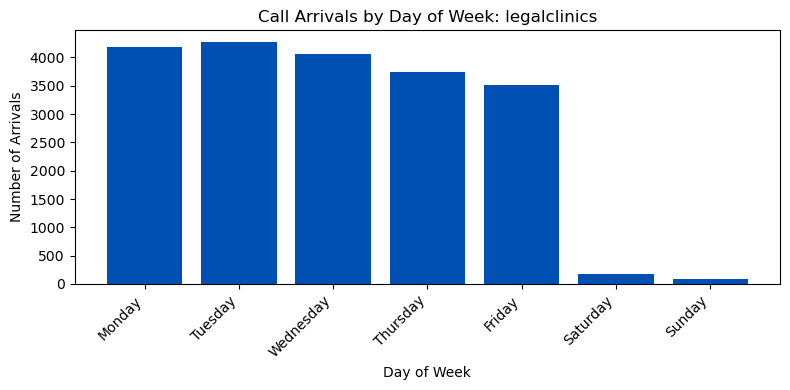

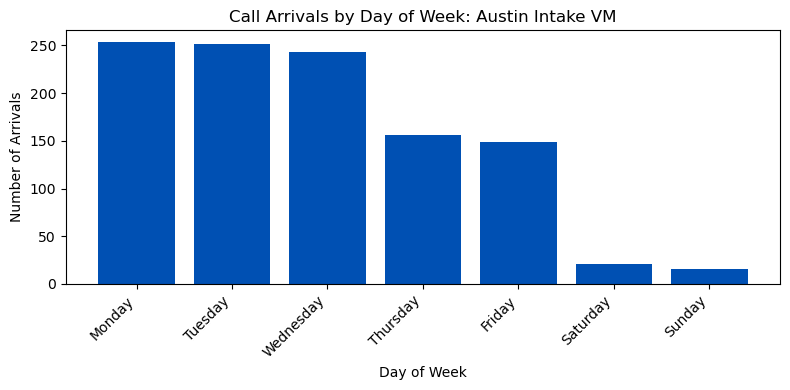

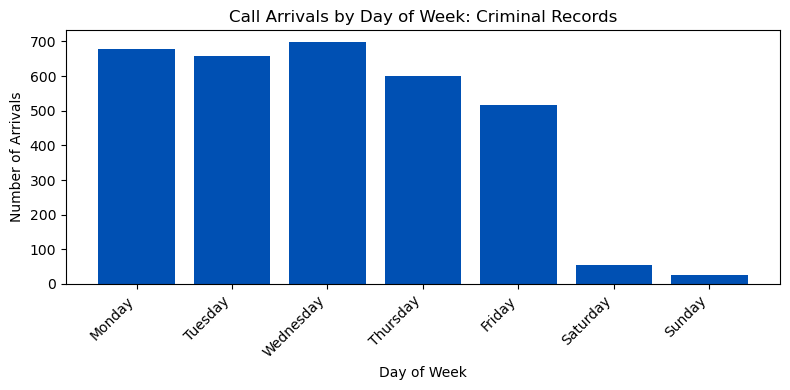

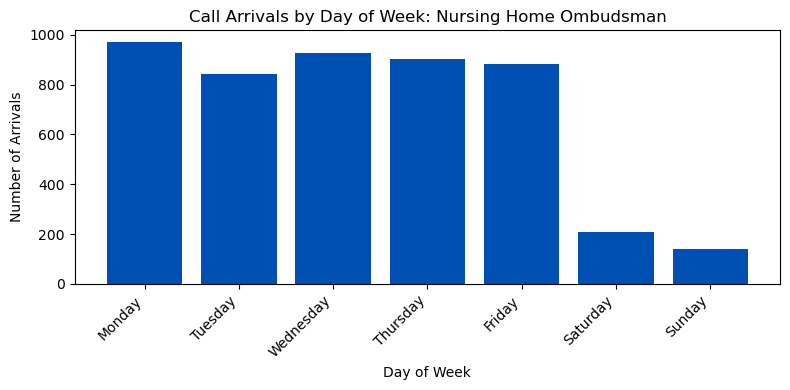

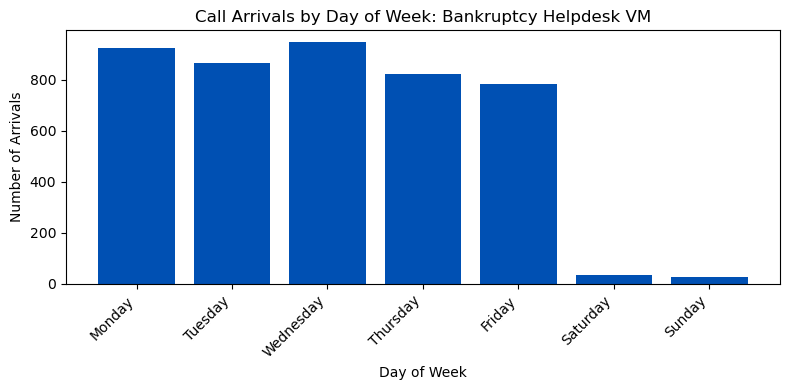

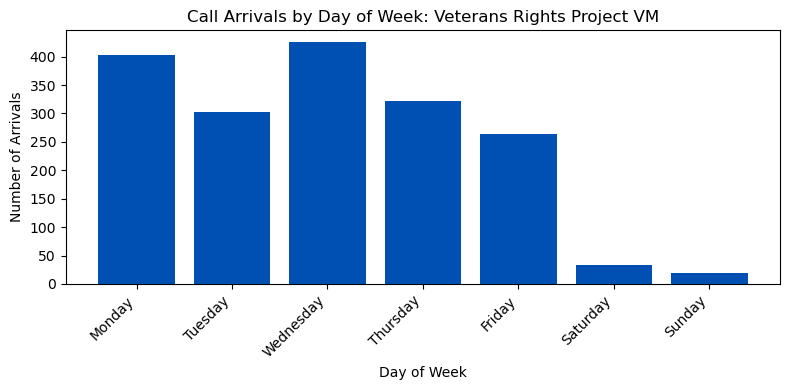

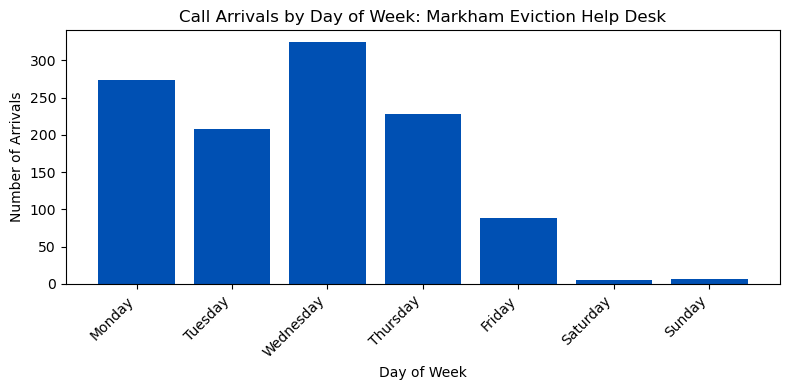

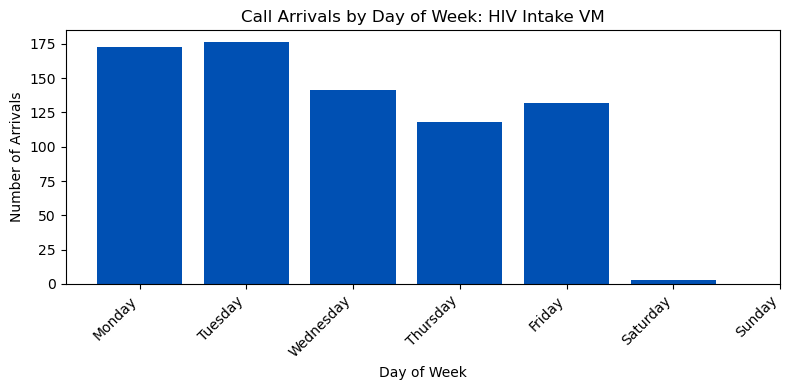

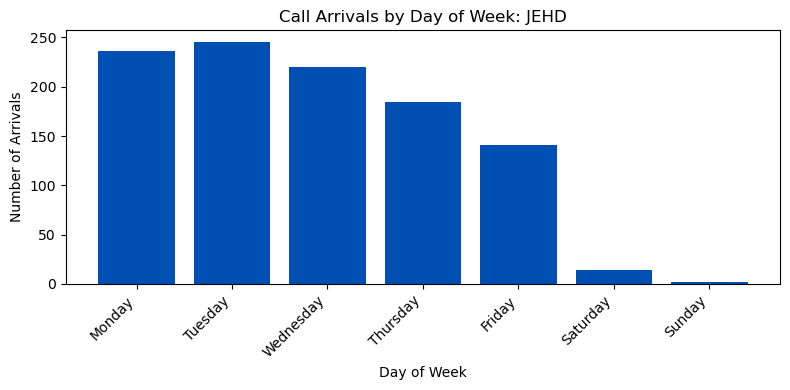

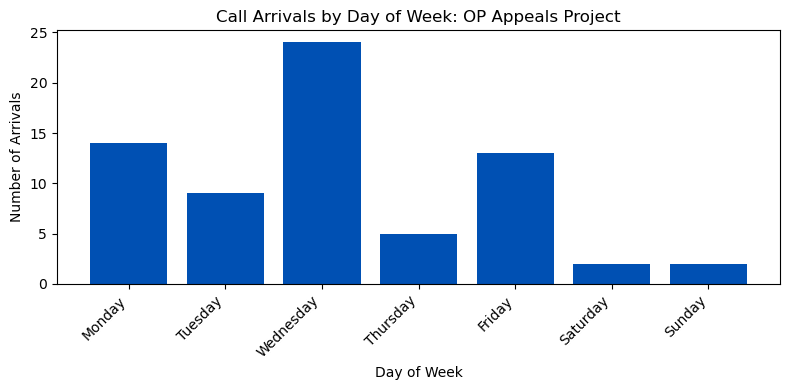

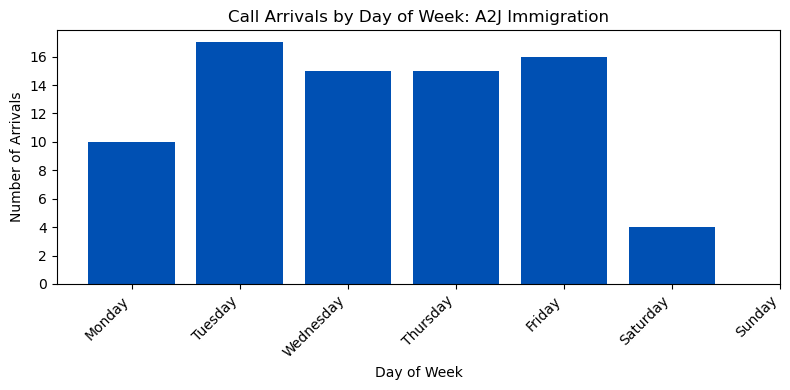

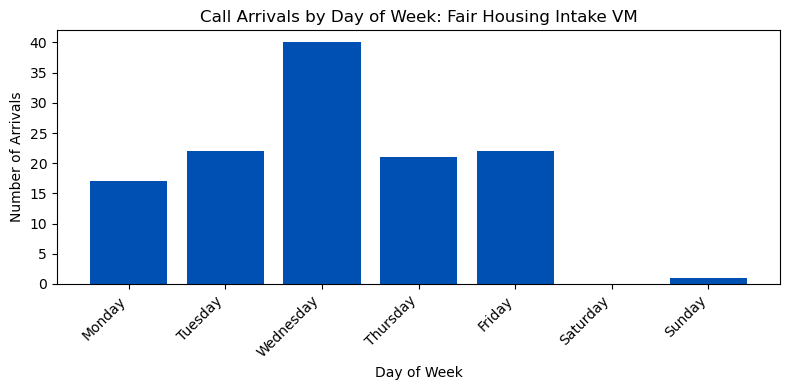

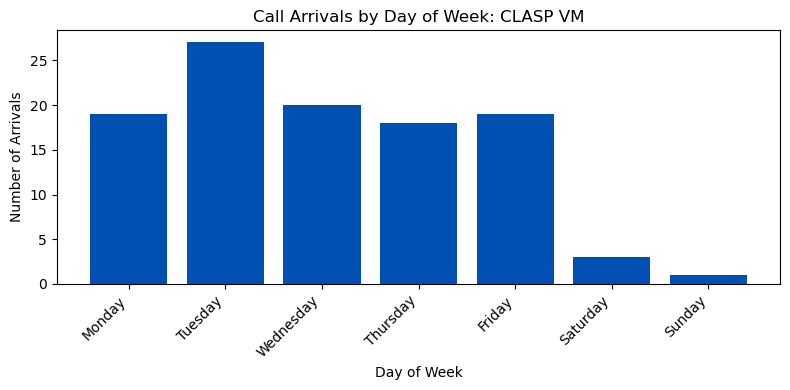

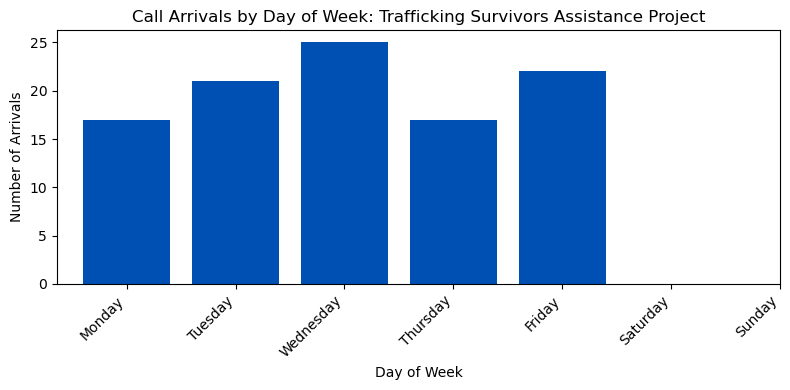

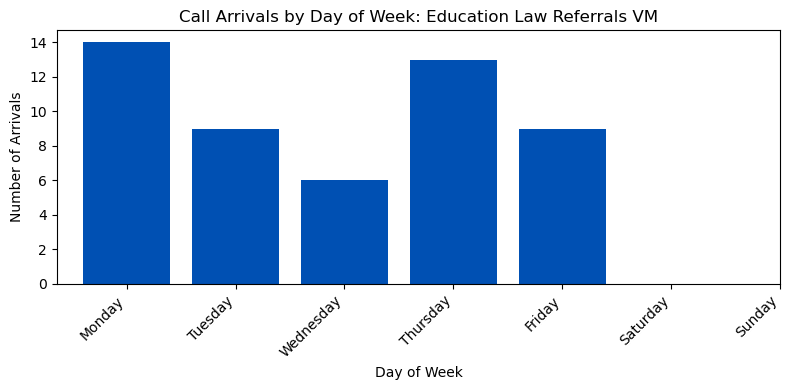

In [131]:
intake_terminating['Day of Week'] = intake_terminating['Start time'].dt.dayofweek

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for line in intake_terminating['Intake Line Name'].unique():
    line_data = intake_terminating[intake_terminating['Intake Line Name'] == line]

    # Plots for Day of week trends
    daily_counts = line_data['Day of Week'].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    plt.bar(daily_counts.index, daily_counts.values, color='#0050B3')
    plt.title(f'Call Arrivals by Day of Week: {line}')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Arrivals')
    plt.xticks(range(7), day_labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

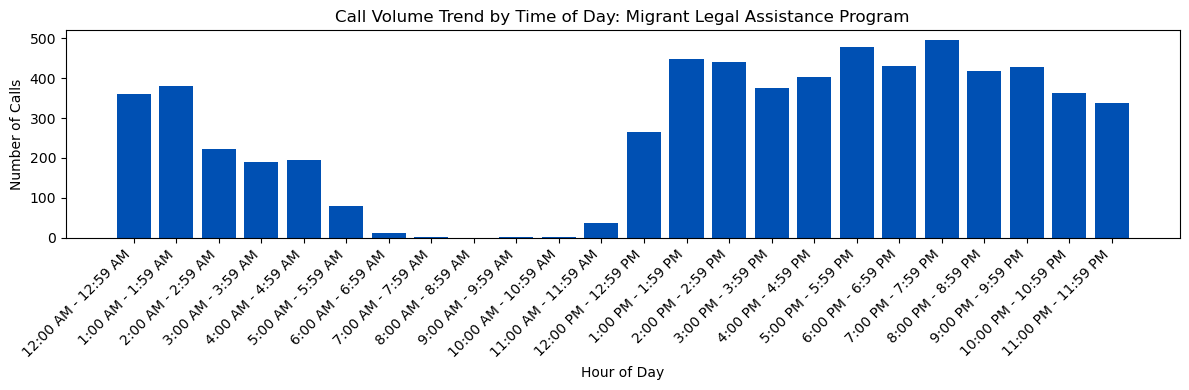

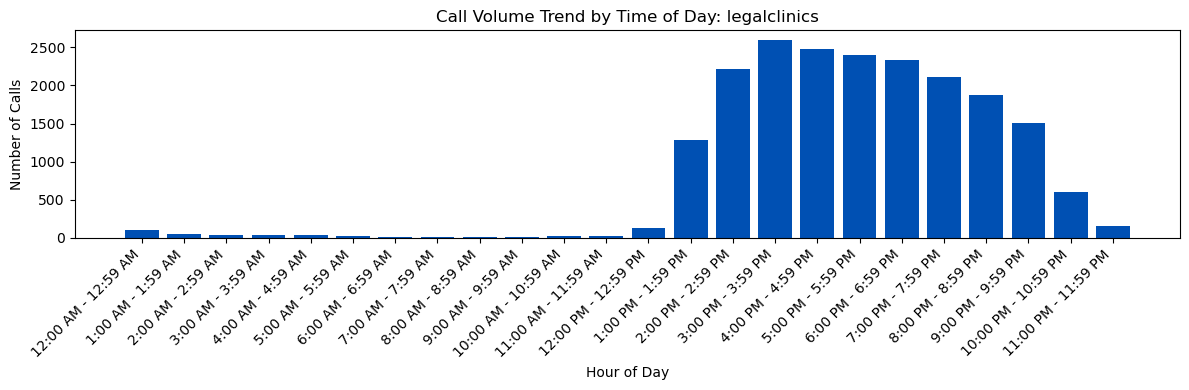

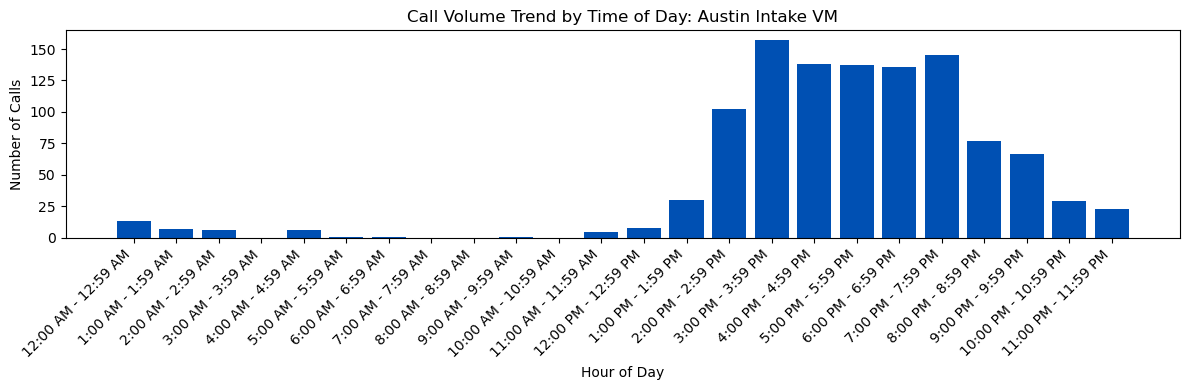

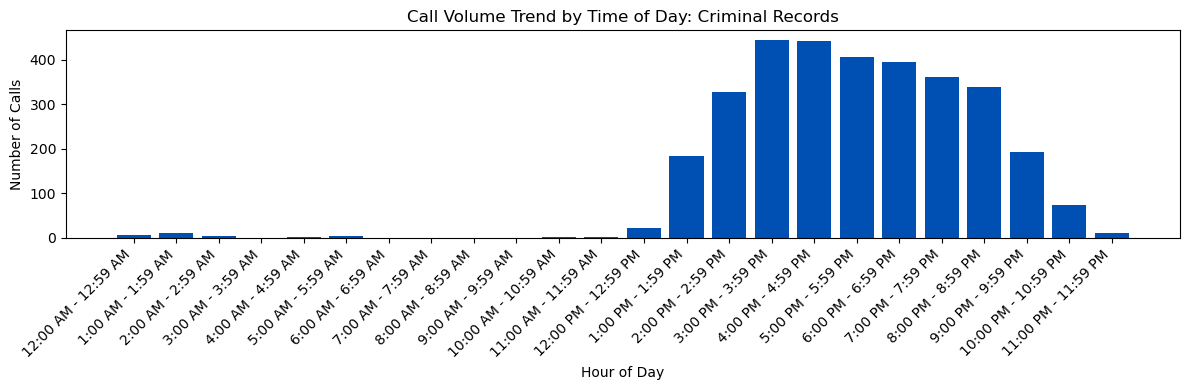

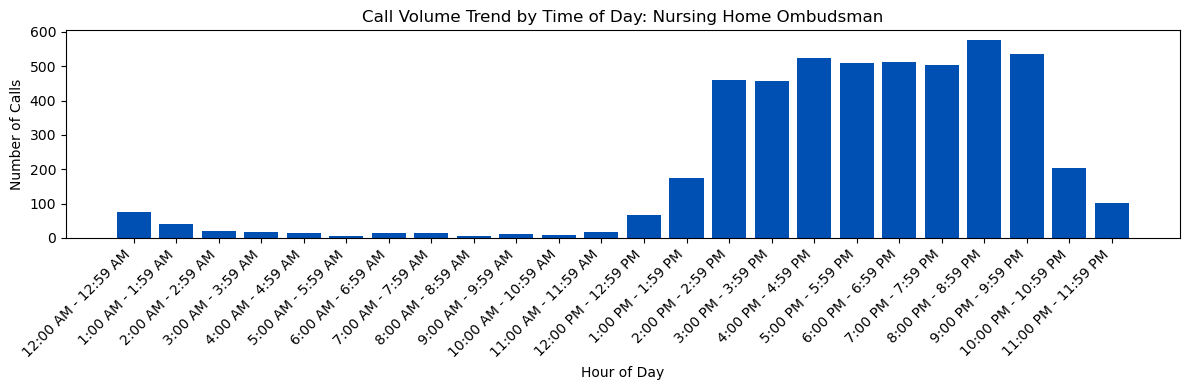

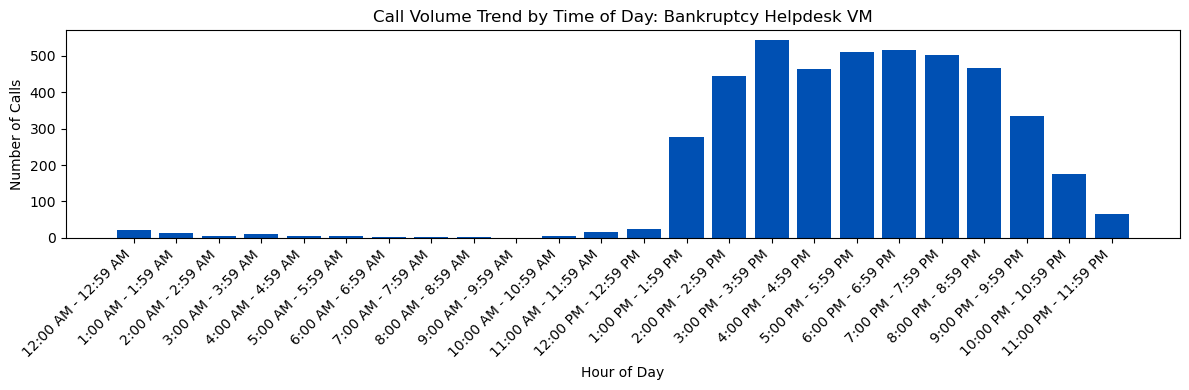

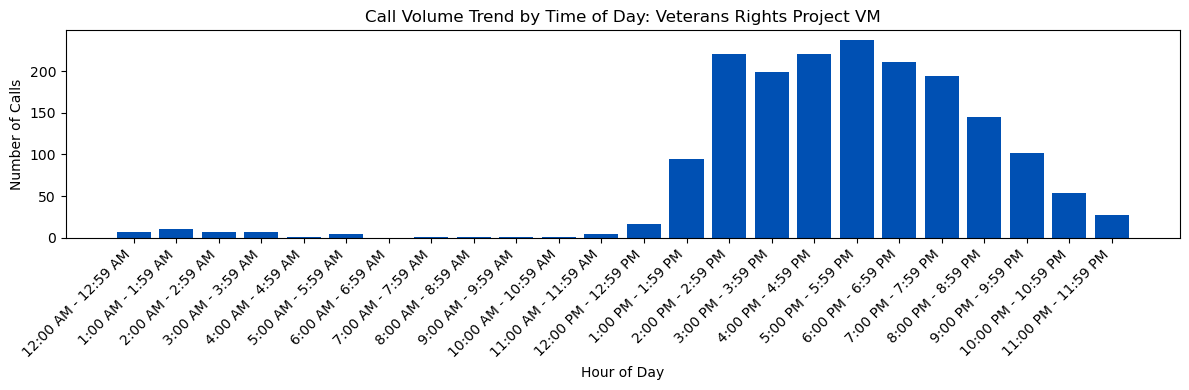

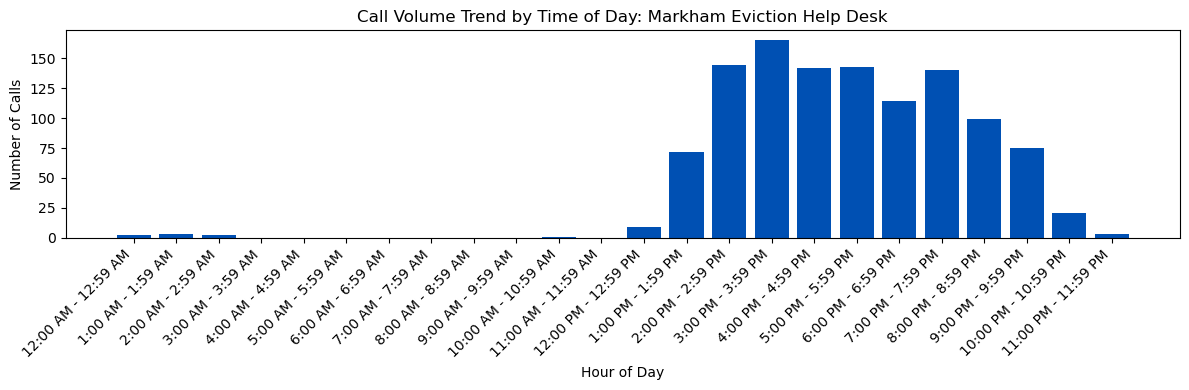

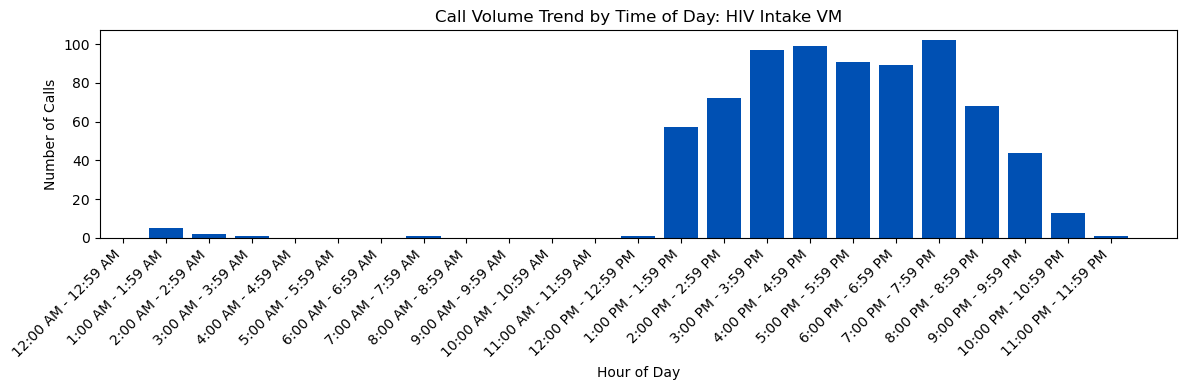

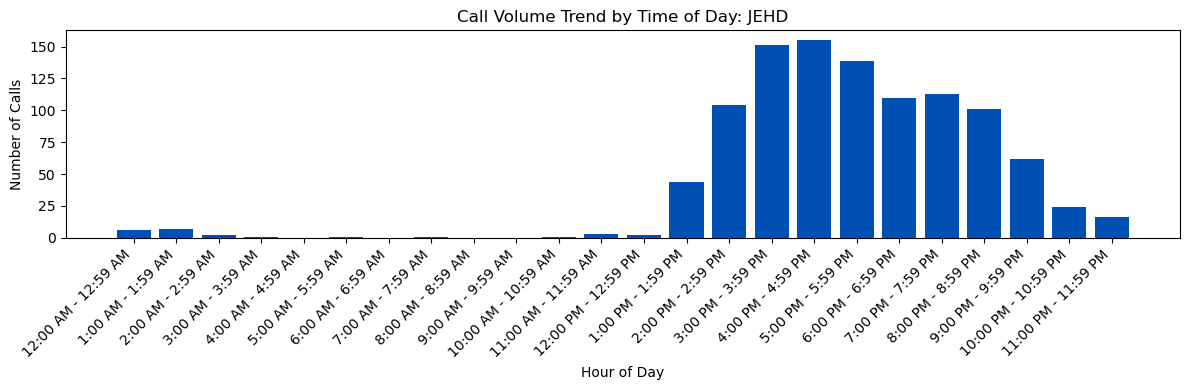

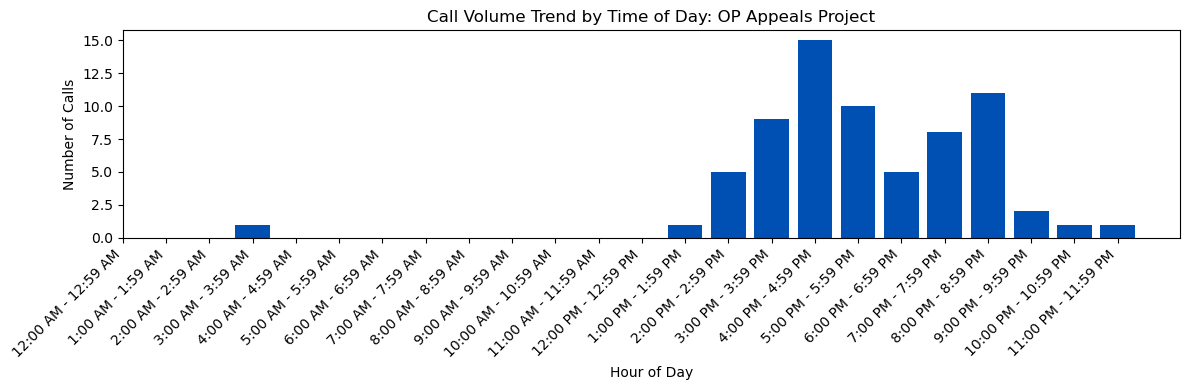

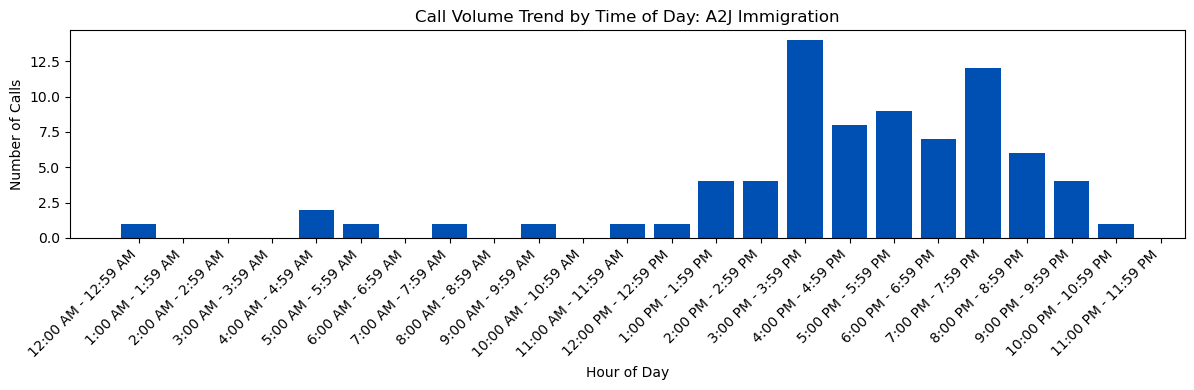

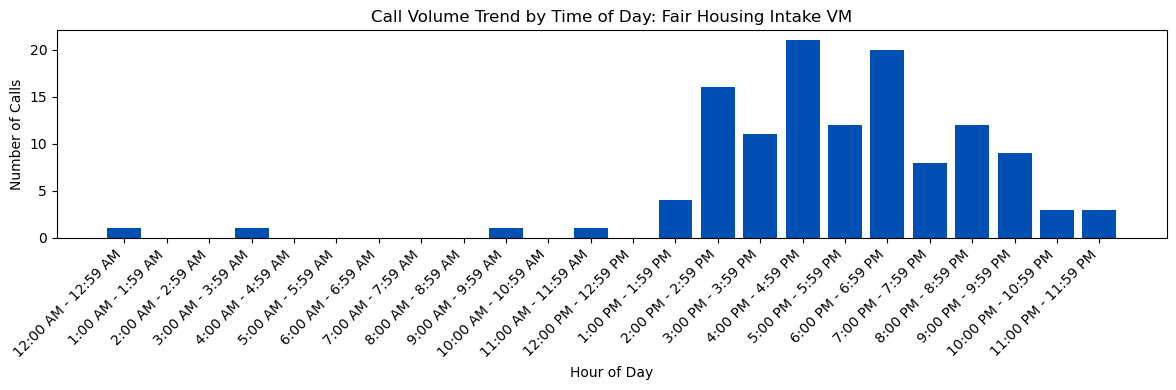

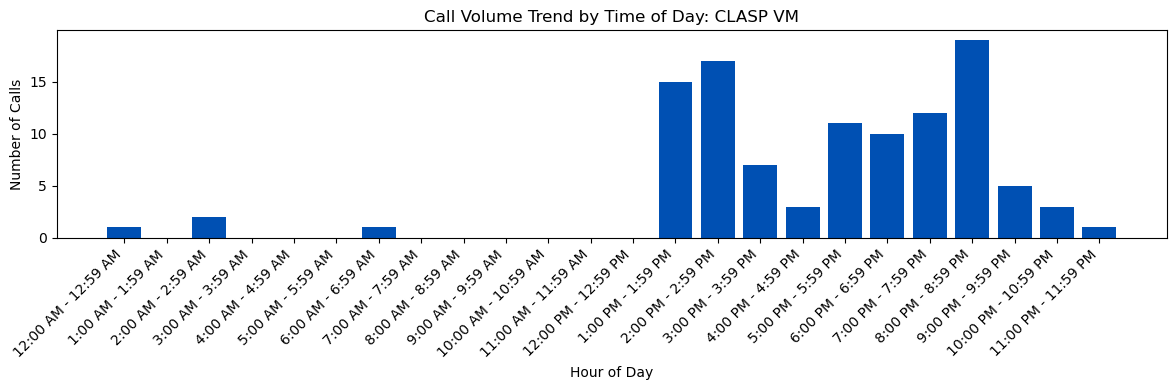

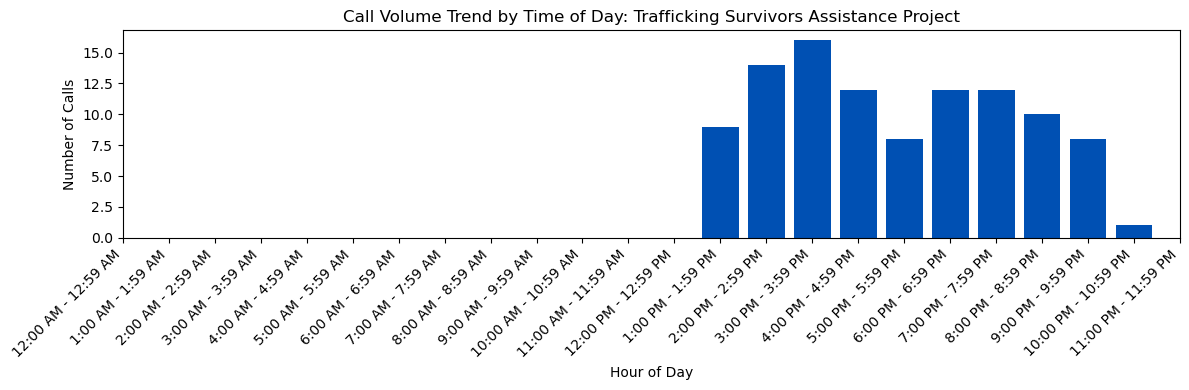

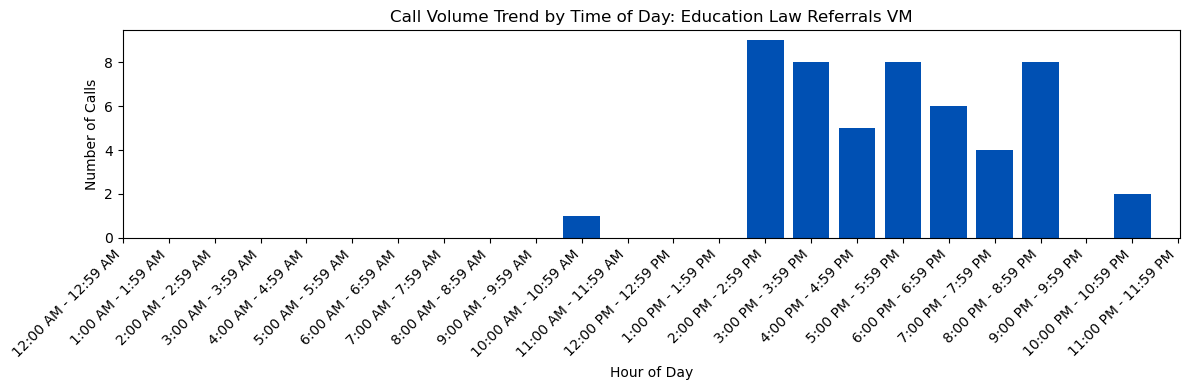

In [154]:

# 12-hour formatted labels
hour_labels = [
    f"{(h % 12 or 12)}:00 {'AM' if h < 12 else 'PM'} - {(h % 12 or 12)}:59 {'AM' if h < 12 else 'PM'}"
    for h in range(24)
]

# Plot for each intake line 
for line in intake_terminating['Intake Line Name'].unique():
    line_data = intake_terminating[intake_terminating['Intake Line Name'] == line]

    hourly_counts = line_data['Hour'].value_counts().sort_index()

    plt.figure(figsize=(12, 4))
    plt.bar(hourly_counts.index, hourly_counts.values, color='#0050B3')
    plt.title(f'Call Volume Trend by Time of Day: {line}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Calls')
    plt.xticks(range(24), hour_labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### 

### Question 3.5: Trends Based on Call Legs

### Average Number of Legs by Intake Line 

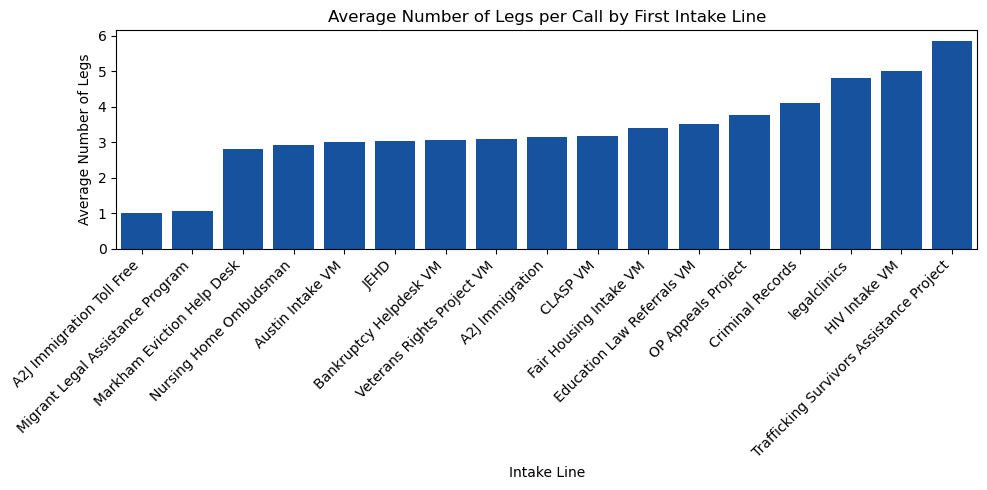

In [168]:
# For each call, getting the first intake line and number of legs
first_leg_line = df.sort_values('Start time').groupby('Correlation ID').first()['Intake Line Name']
legs_per_call = df.groupby('Correlation ID').size()
avg_legs_by_line = legs_per_call.groupby(first_leg_line).mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_legs_by_line.index, y=avg_legs_by_line.values, color='#0050B3')
plt.title('Average Number of Legs per Call by First Intake Line')
plt.xlabel('Intake Line')
plt.ylabel('Average Number of Legs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

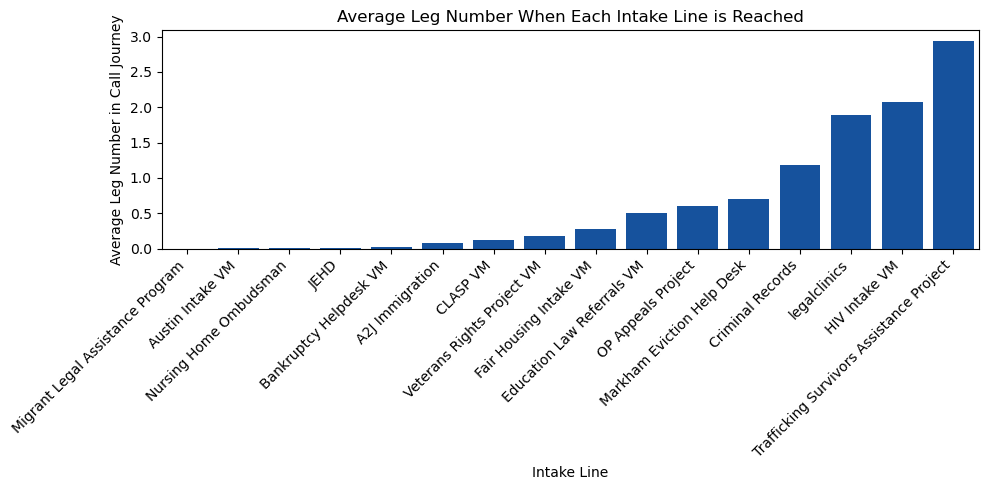

In [232]:
# Assigning a sequential number to each leg within each Correlation ID
df_sorted['Leg Number'] = df_sorted.groupby('Correlation ID').cumcount() 

intake_terminating = df_sorted[df_sorted['Intake Line Name'].notna() & (df_sorted['Direction'] == 'TERMINATING')].copy()

avg_leg_number = intake_terminating.groupby('Intake Line Name')['Leg Number'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_leg_number.index, y=avg_leg_number.values, color='#0050B3')
plt.title('Average Leg Number When Each Intake Line is Reached')
plt.xlabel('Intake Line')
plt.ylabel('Average Leg Number in Call Journey')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

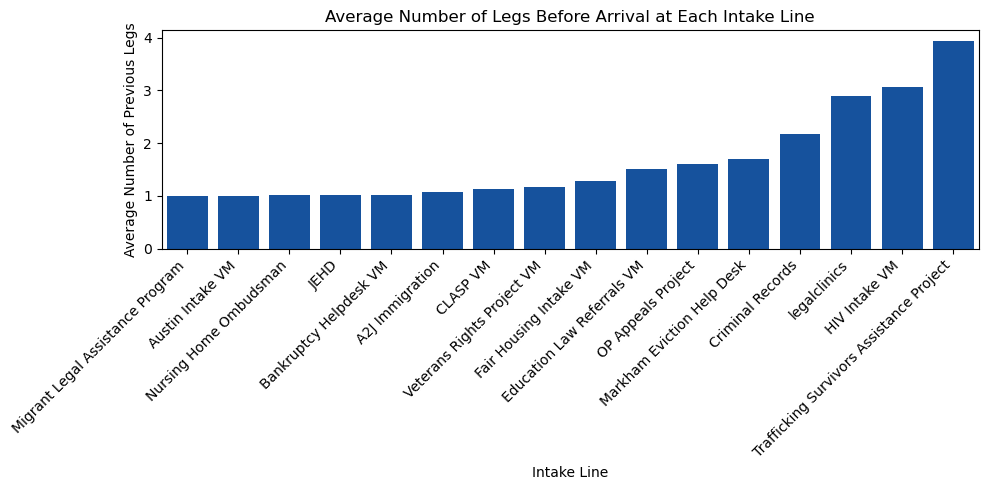

In [230]:
intake_terminating['Legs Before Arrival'] = intake_terminating['Leg Number']

avg_legs_before = intake_terminating.groupby('Intake Line Name')['Legs Before Arrival'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_legs_before.index, y=avg_legs_before.values, color='#0050B3')
plt.title('Average Number of Legs Before Arrival at Each Intake Line')
plt.xlabel('Intake Line')
plt.ylabel('Average Number of Previous Legs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()